# Classification on Origin of Wines &#127863; 
## Adopting Random Forest Algorithm for classification
* This dataset is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license.
* This dataset is accessed through the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/109/wine)
* We will be using this dataset to perform classification of wines based on the its chemical content using random forest 

![](./images/wine1.jpg)

In [1]:
# import library 
# for accessing data from UCI repos
from ucimlrepo import fetch_ucirepo

In [19]:
# import library 
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
from sklearn.tree import plot_tree
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Fetching data 

In [3]:
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets 

# transform y into Series 
y = y.squeeze()

# print features 
# print(wine.variables) 

## Data preparation 

Since the data is well prepared and cleaned, no further data cleaning is performed. 

In [4]:
# splitting data into train set and test set 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Instantiate classifiier

In [7]:
# Instantiate classifier 
classifier = RandomForestClassifier(n_estimators=100,random_state=42,bootstrap=True)

In [8]:
# run a cross validation for the training dataset to understand how cross validation did.
# we use cv = 5 to divide data into 5 segments, and 1 segment is used as validation dataset for 5 epoch 
cv_acc_scores = cross_val_score(classifier,X_train,y_train,cv=5,n_jobs=-1)

# print the accuracy score from five rounds of cross validation 
print(cv_acc_scores)

[1.         1.         0.92857143 0.96428571 1.        ]


## Grid Search for hyperparameter tuning in Random Forest Algorithm

In [9]:
# define the parameters which will be used for training 
params = {
    "n_estimators": range(25,100,25),
    "max_depth":range(10,50,10),
}
params

{'n_estimators': range(25, 100, 25), 'max_depth': range(10, 50, 10)}

In [10]:
# define the model with GridSearch 
model = GridSearchCV(
    estimator=classifier,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1
)
model

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(10, 50, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

## Model training 

In [11]:
# Fit the model with training data
model.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(10, 50, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [12]:
# store the model cross validation in dataframe 
result_df = pd.DataFrame(model.cv_results_)
result_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.046501,0.010162,0.004373,0.001357,10,25,"{'max_depth': 10, 'n_estimators': 25}",1.0,1.0,0.964286,0.892857,1.0,0.971429,0.041650,5
1,0.078267,0.019237,0.006852,0.002200,10,50,"{'max_depth': 10, 'n_estimators': 50}",1.0,1.0,0.928571,0.928571,1.0,0.971429,0.034993,5
2,0.192223,0.025608,0.015332,0.002984,10,75,"{'max_depth': 10, 'n_estimators': 75}",1.0,1.0,0.928571,0.964286,1.0,0.978571,0.028571,1
3,0.072247,0.014236,0.005395,0.000547,20,25,"{'max_depth': 20, 'n_estimators': 25}",1.0,1.0,0.964286,0.892857,1.0,0.971429,0.041650,5
4,0.097086,0.007089,0.007031,0.000568,20,50,"{'max_depth': 20, 'n_estimators': 50}",1.0,1.0,0.928571,0.928571,1.0,0.971429,0.034993,5


## Information on training 

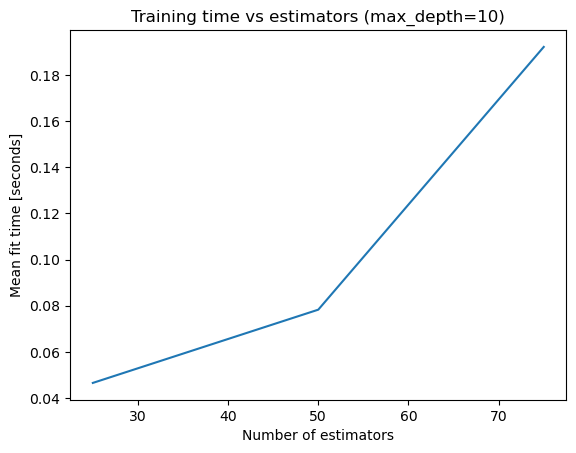

In [13]:
# Create mask
mask = result_df['param_max_depth']==10

# Plot fit time vs n_estimators
plt.plot(result_df[mask]['param_n_estimators'],
        result_df[mask]['mean_fit_time'])

# Label axes
plt.xlabel("Number of estimators")
plt.ylabel("Mean fit time [seconds]")
plt.title("Training time vs estimators (max_depth=10)");

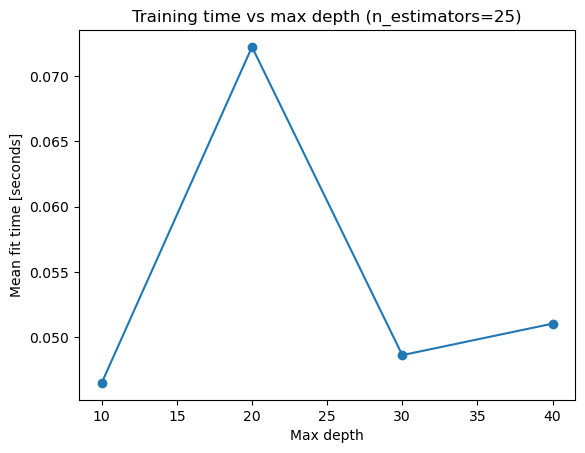

In [14]:
# Create mask
mask = result_df['param_n_estimators']==25

# Plot fit time vs max_depth
plt.plot(result_df[mask]['param_max_depth'],
        result_df[mask]['mean_fit_time']
        
        )
plt.scatter(result_df[mask]['param_max_depth'],
        result_df[mask]['mean_fit_time']
        
        )
# Label axes
plt.xlabel("Max depth")
plt.ylabel("Mean fit time [seconds]")
plt.title("Training time vs max depth (n_estimators=25)");

In [15]:
# get the best paramaters
model.best_params_

{'max_depth': 10, 'n_estimators': 75}

## Accuracy using test set 

In [16]:
acc_train = model.score(X_train,y_train)
acc_test = model.score(X_test,y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 1.0


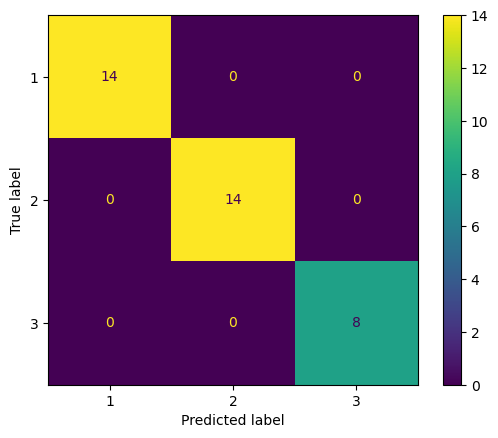

In [29]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test);

In [17]:
# Print classification report
classification_report(y_test,model.predict(X_test))
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



## What are the important features ?

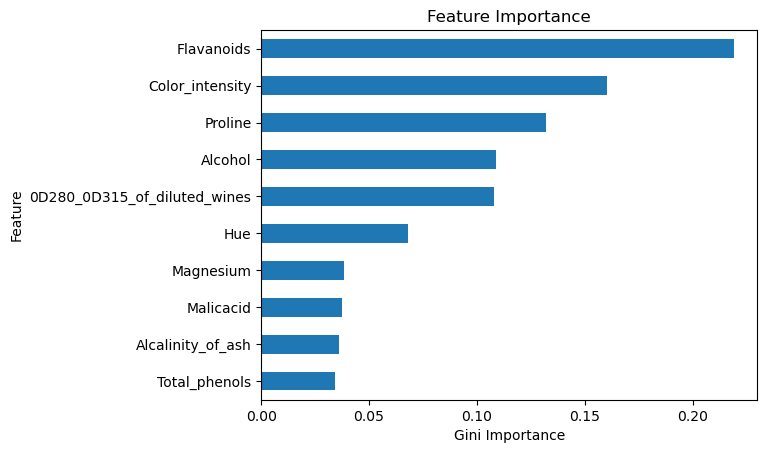

In [18]:
# Get feature names from training data
features = X_train.columns
# Extract importances from model
importances = model.best_estimator_.feature_importances_
# Create a series with feature names and importances
feat_imp = pd.Series(data=importances,index=features).sort_values()
# Plot 10 most important features
feat_imp.tail(10).plot(kind='barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

## Visualise one of the trees in best random forest model

In [36]:
best_model = model.best_estimator_
best_model

RandomForestClassifier(max_depth=10, n_estimators=75, random_state=42)

In [32]:
tree_to_plot = best_model.estimators_[3]

In [33]:
tree_to_plot

DecisionTreeClassifier(max_depth=10, max_features='sqrt',
                       random_state=787846414)

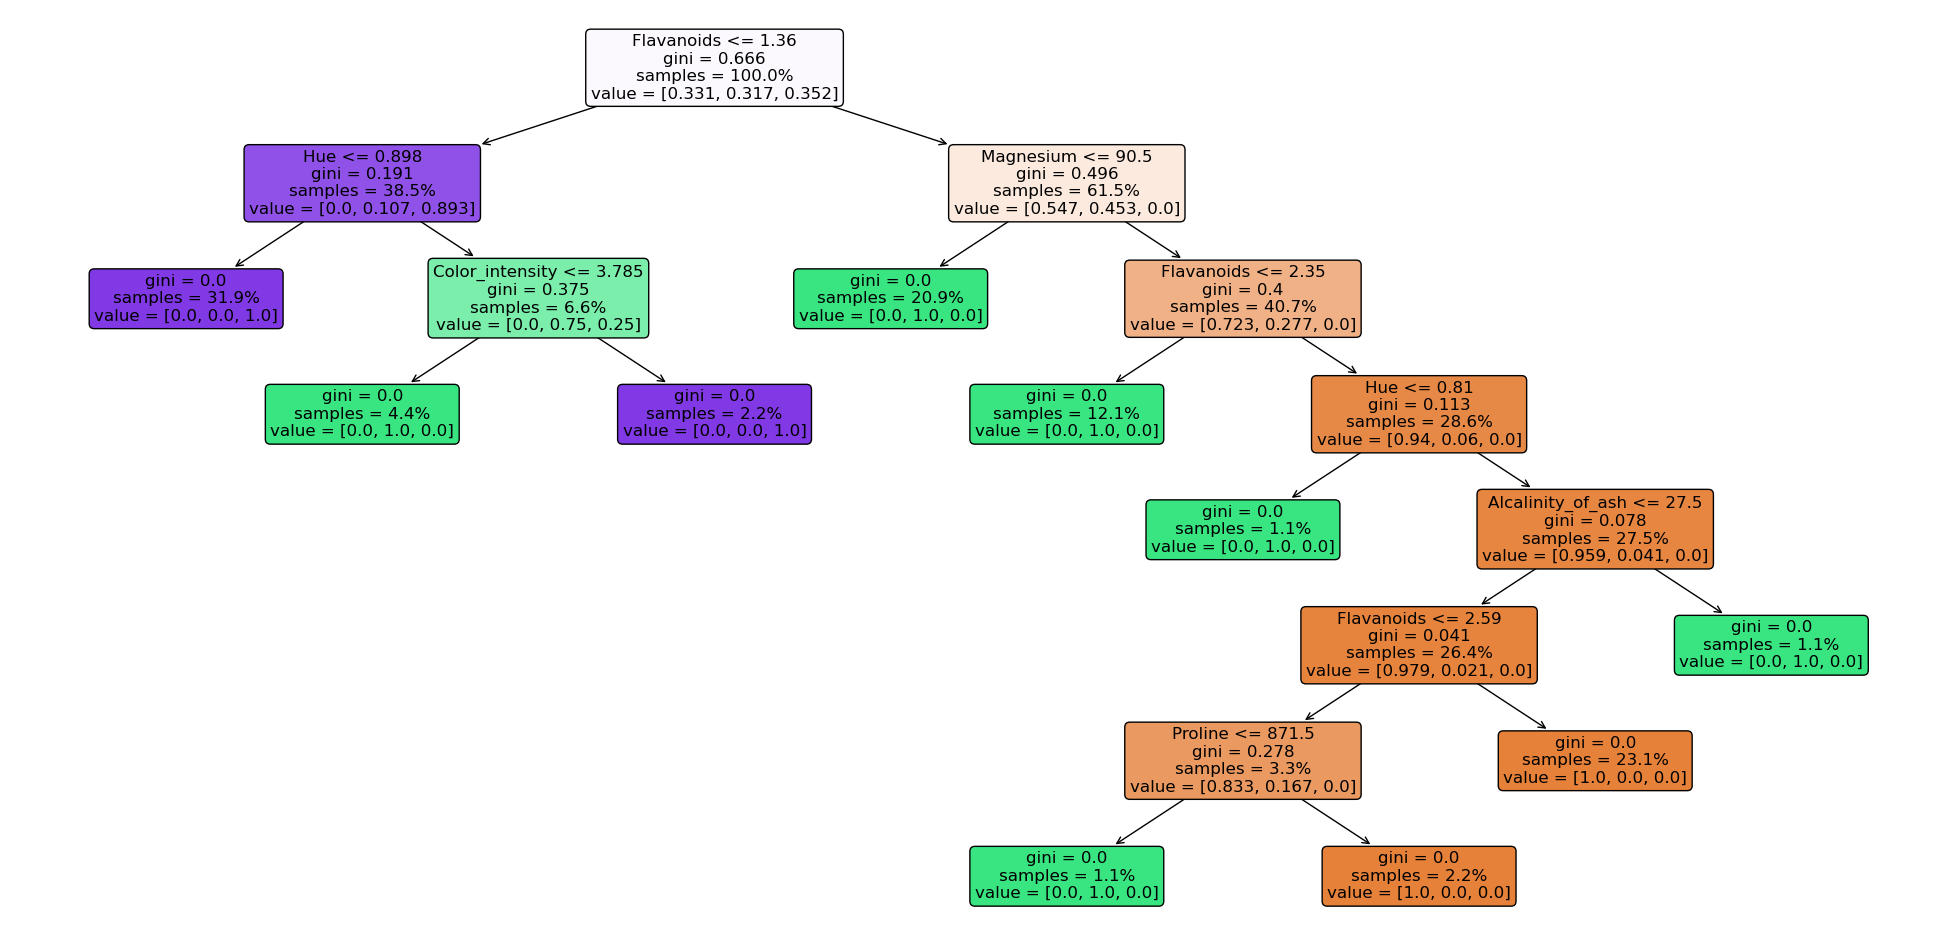

In [35]:
# Create larger figure
fig, ax = plt.subplots(figsize=(25, 12))
# Plot tree
plot_tree(
    decision_tree=tree_to_plot,
    feature_names=X_train.columns,
    filled=True,  # Color leaf with class
    rounded=True,  # Round leaf edges
    proportion=True,  # Display proportion of classes in leaf
    max_depth=10,  # Only display first 3 levels
    fontsize=12,  # Enlarge font
    ax=ax,  # Place in figure axis
);
plt.savefig('/Users/kang/Documents/Portfolio/Wine/images/randomforest.jpg')